# The Sparks Foundation - GRIP
## Data Science & Business Analytics Intern

## Task2: Prediction using Unsupervised ML

### Task Description
In this clustering task related to Unsupervised learning we will try to predict the optimum number of clusters I have used python and its built in libraries such as numpy, pandas, kmeans clustering techniques as well as used matplot lib library for ploting the predicted results as well as the variable ploting.

The intent of this task related coding work is

1) To run the unsupervised learning techniques on the given 'iris' dataset and to predict the optimum number of clusters and

2) Represent those clusters visually by ploting against their centroids

#### STEP 1: IMPORTING THE STANDARD LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

#### STEP 2: LOAD THE DATASET

In [2]:
df = sns.load_dataset('iris')

#### STEP 3: PRE-PROCESSING

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

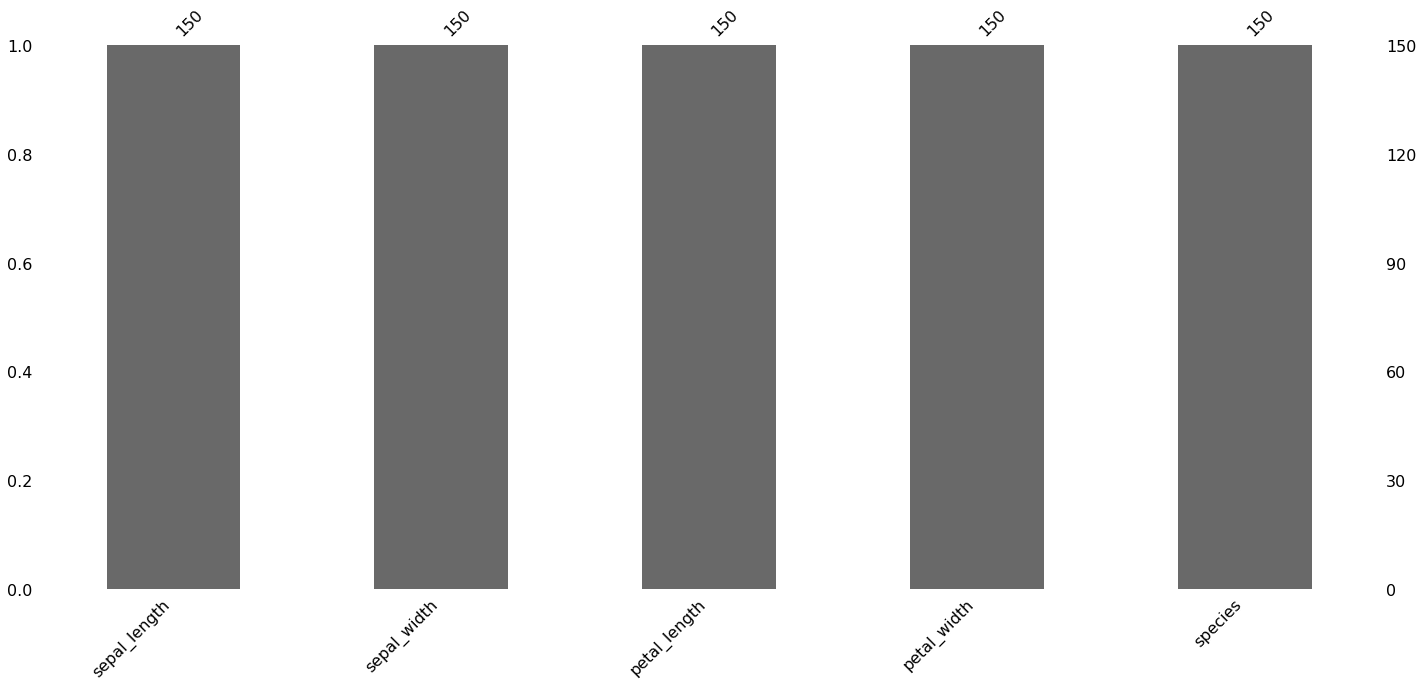

In [6]:
# Visualizing null values
msno.bar(df)

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### STEP 4: DATA-VISUALIZATION

<AxesSubplot:>

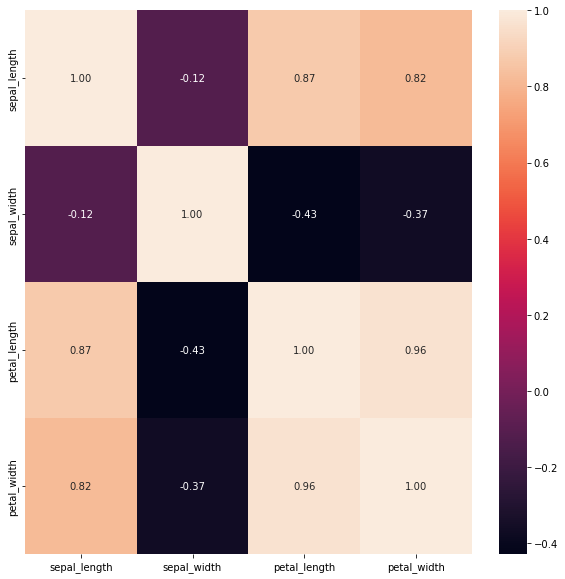

In [9]:
# Correlation 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

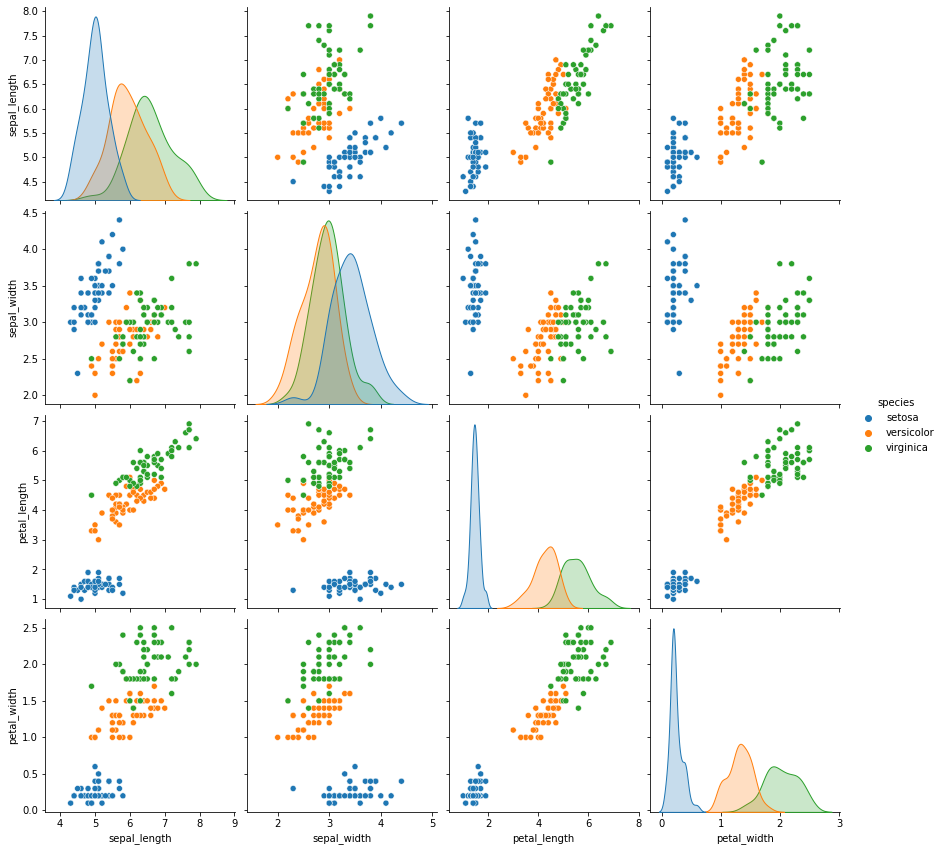

In [10]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(data=df, hue="species", size=3, diag_kind="kde")

In [11]:
# Let's see how many examples we have of each species
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

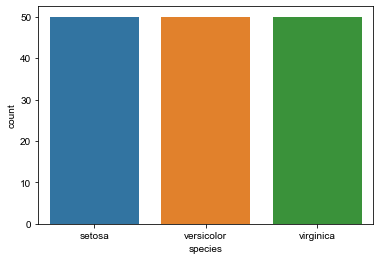

In [12]:
sns.countplot(df['species'])
sns.set_theme(style = "darkgrid")
plt.show()

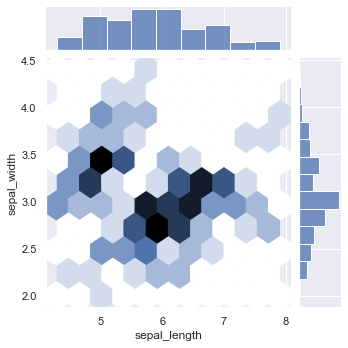

In [13]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="sepal_length", y="sepal_width", data=df, size=5,kind='hex')

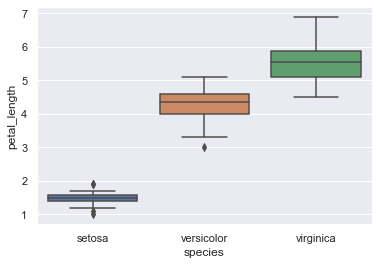

In [14]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="species", y="petal_length", data=df)
sns.set_theme(style = "darkgrid")
plt.show()

#### STEP 5: DETERMINING THE OPTIMUM NUMBER OF CLUSTER FOR K-means CLASSIFICATION

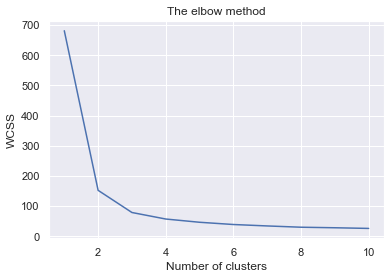

In [15]:
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Observations:
The above graph having an elbow shape and it's called an **"ELBOW METHOD"** and the optimum cluster is where the elbow occurs.
This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. In this case it is happening at the value of 3.
We do choose number of optimum cluster as 3 , which answers the first portion of our initial problem statement

#### STEP 6: CREATING THE K-means CLASSIFER

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

In [17]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

#### STEP 7: PLOTTING THE CLUSTERS

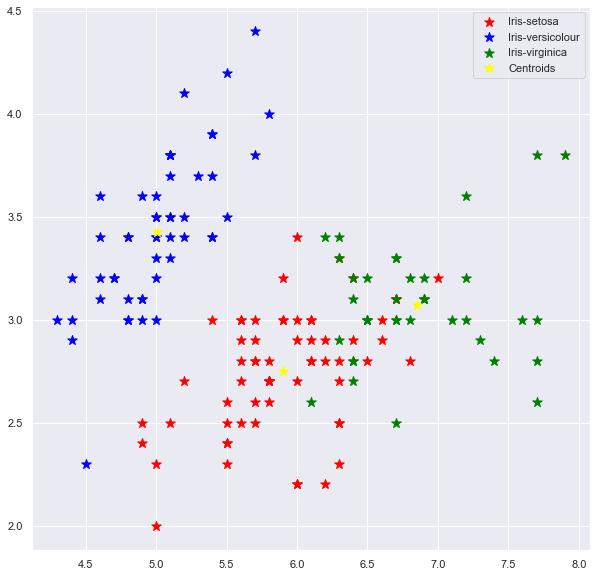

In [18]:
plt.figure(figsize = (10,10))
plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa', marker="*")
plt.scatter(x[y_kmeans == 1, 0],x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour', marker="*")
plt.scatter(x[y_kmeans == 2, 0],x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica', marker="*")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids', marker="*")
plt.legend()

#### STEP 8: 3D VISUALIZATION

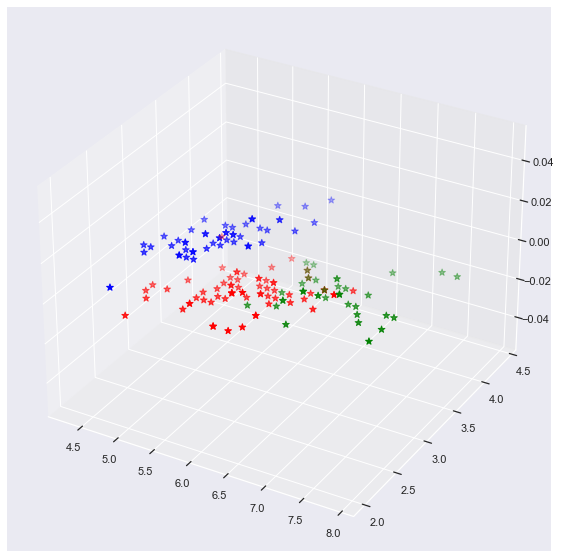

In [19]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa', marker="*")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour', marker="*")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica', marker="*")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids', marker="*")
plt.show()

 #### CONCLUSION:
we have figured out the optimum number of clusters for the given iris dataset as 3 and also the clusters have been represented visually as a scattered plot.